# Fusion des fichiers logs et logs error

### L'objectif est d'observer le nombre d'opérations réussies et d'erreur par heure, sur la période de temps disponible (aout-novembre 24)

#### Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

## Import et préparation du fichier log error

In [73]:
# Ouverture du fichier
df_error = pd.read_csv('../Data/logEtl/241016_LogETLError.csv', sep=';', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

In [74]:
df_error.head()

,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,ETL_StartDateTime,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,2024-08-24 23:32:03,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34


In [75]:
# Conversion de la colonne ETL_StartDateTime en Datetime pandas
df_error['ETL_StartDateTime']=pd.to_datetime(df_error['ETL_StartDateTime'], format="%Y-%m-%d %H:%M:%S")

In [76]:
# Récupération de la date de début et de fin du fichier

start_date = df_error['ETL_StartDateTime'].min()
end_date = df_error['ETL_StartDateTime'].max()

print("Date la plus ancienne :", start_date)
print("Date la plus récente :", end_date)

Date la plus ancienne : 2024-08-24 23:32:03
Date la plus récente : 2024-10-15 23:31:49


In [77]:
# Ajout d'une colonne Date et heure ne tenant pas compte des minutes
df_error["Date et heure"] = df_error["ETL_StartDateTime"].dt.floor("h")

In [78]:
# Group by la colonne Date et heure en faisant le nombre d'opérations
df_error_grouped = df_error.groupby("Date et heure").agg(
    nb_operations_error=("Type", "count")
).reset_index()

In [108]:
df_error_grouped = df_error_grouped.iloc[1:]

In [109]:
print(df_error_grouped.shape)
df_error_grouped.head()

(157, 2)


,Date et heure,nb_operations_error
1,2024-08-25 12:00:00,110
2,2024-08-25 23:00:00,3
3,2024-08-26 06:00:00,1
4,2024-08-26 10:00:00,1
5,2024-08-26 11:00:00,1


## Import et préparation du fichier log

In [80]:
# Ouverture du fichier
df = pd.read_parquet("/Users/guillaumeramirez/OneDrive - CentraleSupelec/Smart ETL - DOR/data/parquet/LogETL_20250130.csv_sub_2501301744.parquet")

In [81]:
df.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.0,6.0.0,TMS/MF_TrajetsNew,Modèle simple,Mise à jour données / Insertion données,36861,0,36642,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:08,Launcher_Name_sub_5,ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f,ETL Opti TMS 1h,ETLPROGRAMMATIONBG7G6W,ETL Opti TMS toutes les 1h Lun-Sam,14/03/2024 15:41
1,6.0.0,6.0.0,TMS/MF_FactureFournisseursSansDetails,Modèle simple,Mise à jour données / Insertion données,118,0,44,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
2,6.0.0,6.0.0,TMS/MF_FacturesSansDetails,Modèle simple,Mise à jour données / Insertion données,369,0,17,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
3,6.0.0,6.0.0,TMS/MF_SAV,Modèle simple,Mise à jour données / Insertion données,277,0,191,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
4,6.0.0,6.0.0,TMS/MF_FactureFournisseurs,Modèle simple,Mise à jour données / Insertion données,1036,0,428,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01


In [82]:
# Conversion de la colonne ETL_StartDateTime en Datetime pandas
df['ETL_StartDateTime']=pd.to_datetime(df['ETL_StartDateTime'], format="%d/%m/%Y %H:%M")

In [83]:
df.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.0,6.0.0,TMS/MF_TrajetsNew,Modèle simple,Mise à jour données / Insertion données,36861,0,36642,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:08:00,Launcher_Name_sub_5,ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f,ETL Opti TMS 1h,ETLPROGRAMMATIONBG7G6W,ETL Opti TMS toutes les 1h Lun-Sam,14/03/2024 15:41
1,6.0.0,6.0.0,TMS/MF_FactureFournisseursSansDetails,Modèle simple,Mise à jour données / Insertion données,118,0,44,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
2,6.0.0,6.0.0,TMS/MF_FacturesSansDetails,Modèle simple,Mise à jour données / Insertion données,369,0,17,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
3,6.0.0,6.0.0,TMS/MF_SAV,Modèle simple,Mise à jour données / Insertion données,277,0,191,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
4,6.0.0,6.0.0,TMS/MF_FactureFournisseurs,Modèle simple,Mise à jour données / Insertion données,1036,0,428,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01


In [84]:
# Réduction du df pour qu'il soit dans la bonne période
df_reduced = df[(df['ETL_StartDateTime'] >= start_date) & (df['ETL_StartDateTime'] <= end_date)]

In [85]:
df_reduced.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
122840,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies P...,Modèle Excel,Insertion données,33,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122841,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies V...,Modèle Excel,Insertion données,9,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122842,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies M...,Modèle Excel,Insertion données,15,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122843,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies P...,Modèle Excel,Insertion données,19,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122844,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies V...,Modèle Excel,Insertion données,11,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16


In [86]:
# Ajout d'une colonne Date et heure ne tenant pas compte des minutes
df_reduced["Date et heure"] = df_reduced["ETL_StartDateTime"].dt.floor("h")

/var/folders/f4/k8l34hms3tj0bm4tlr3mwg080000gn/T/ipykernel_14794/489622601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["Date et heure"] = df_reduced["ETL_StartDateTime"].dt.floor("h")


In [87]:
df_reduced.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime,Date et heure
122840,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies P...,Modèle Excel,Insertion données,33,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122841,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies V...,Modèle Excel,Insertion données,9,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122842,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies M...,Modèle Excel,Insertion données,15,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122843,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies P...,Modèle Excel,Insertion données,19,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122844,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies V...,Modèle Excel,Insertion données,11,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00


In [88]:
df_reduced.shape

(48112, 29)

In [89]:
df_grouped = df_reduced.groupby("Date et heure").agg(
    nb_operations=("Insert mode", "count"),  # Nombre total de lignes dans l'heure
    rows_added=("Rows added", "sum"),      # Somme des lignes ajoutées
    rows_updated=("Rows updated", "sum"),  # Somme des mises à jour
    rows_deleted=("Rows deleted", "sum")   # Somme des suppressions
).reset_index()

In [90]:
df_grouped.head()

,Date et heure,nb_operations,rows_added,rows_updated,rows_deleted
0,2024-08-25 04:00:00,11,200563,0,0
1,2024-08-25 10:00:00,30,8333604,0,0
2,2024-08-25 12:00:00,16,6207430,0,0
3,2024-08-25 22:00:00,16,192159,0,0
4,2024-08-25 23:00:00,408,474322006,0,18598


In [91]:
df_grouped.shape

(769, 5)

## Fusion des deux fichiers

In [110]:
# Fusion des deux fichiers
df_final = df_error_grouped.merge(
    df_grouped,
    on="Date et heure",
    how="outer",
)

# Changement des valeurs NaN en 0
df_final = df_final.fillna(0)

In [111]:
df_final.head()

,Date et heure,nb_operations_error,nb_operations,rows_added,rows_updated,rows_deleted
0,2024-08-25 04:00:00,0.0,11,200563,0,0
1,2024-08-25 10:00:00,0.0,30,8333604,0,0
2,2024-08-25 12:00:00,110.0,16,6207430,0,0
3,2024-08-25 22:00:00,0.0,16,192159,0,0
4,2024-08-25 23:00:00,3.0,408,474322006,0,18598


In [112]:
df_final.shape

(769, 6)

# Optionel pour visualisation

In [77]:
df_filtered = df_final[df_final["Date et heure"].dt.date == pd.to_datetime("2024-10-03").date()]

df_filtered.head()

,Hour,nb_operations_error,nb_operations,rows_added,rows_updated,rows_deleted
117,2024-10-03 05:00:00,1,1.0,0.0,0.0,0.0
118,2024-10-03 06:00:00,2,26.0,8148258.0,0.0,0.0
119,2024-10-03 07:00:00,2,53.0,17156611.0,0.0,0.0
120,2024-10-03 08:00:00,2,25.0,8147280.0,0.0,0.0
121,2024-10-03 17:00:00,4230,59.0,8916932.0,0.0,47.0


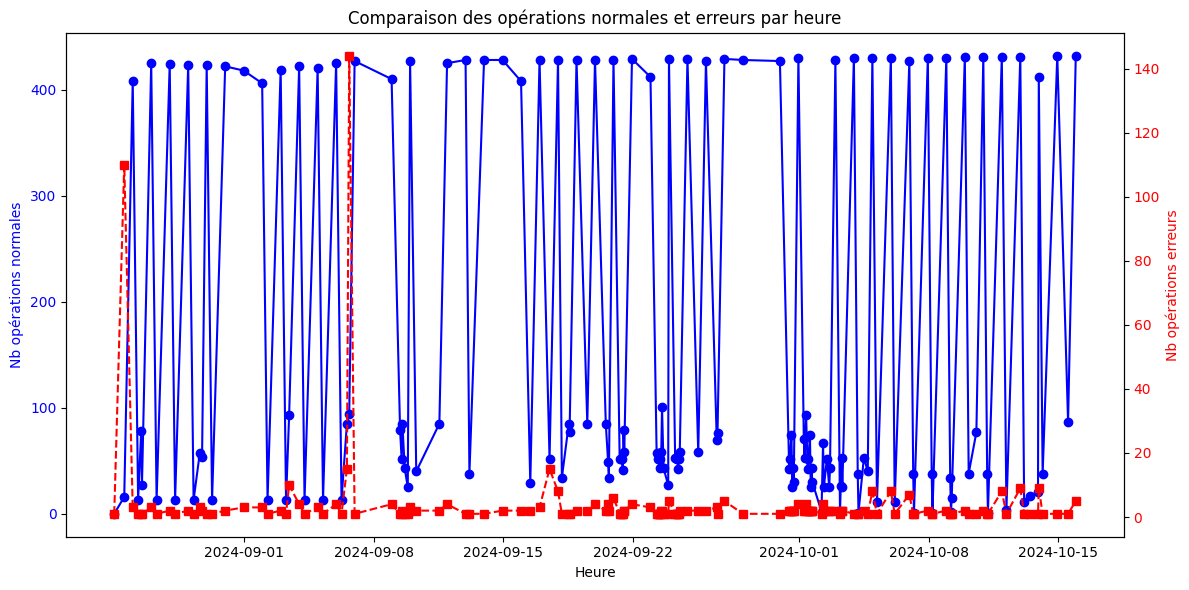

In [78]:
# Visualisation

df_filtered = df_final[~(df_final['Hour'] == '2024-08-29 11:00:00')]
df_filtered = df_filtered[~(df_filtered['Hour'] == '2024-10-03 17:00:00')]

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe principal (opérations normales)
ax1.plot(df_filtered["Hour"], df_filtered["nb_operations"], marker="o", linestyle="-", label="Nb opérations normales", color="blue")
ax1.set_xlabel("Heure")
ax1.set_ylabel("Nb opérations normales", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Création d'un second axe Y pour les erreurs
ax2 = ax1.twinx()
ax2.plot(df_filtered["Hour"], df_filtered["nb_operations_error"], marker="s", linestyle="--", label="Nb opérations erreurs", color="red")
ax2.set_ylabel("Nb opérations erreurs", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Titre et légende
plt.title("Comparaison des opérations normales et erreurs par heure")
fig.tight_layout()

# Rotation des dates pour meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique
plt.show()


In [79]:
top_program = df_error['Program_Name'].value_counts()
top_program = top_program.head()
top_program.head()

Program_Name
ETL sur ordre                       201962
Tous les jours                         166
Toutes les semaines, le dimanche       111
ETL GLPI                                53
ETL Heures Chauffeurs                   29
Name: count, dtype: int64

In [80]:
top_program = df['Program_Name'].value_counts()
top_program = top_program.head()
top_program.head()

Program_Name
Tous les jours           123924
ETL BEXT                  64857
ETL Chargement PJ         37810
ETL GLPI                  21405
ETL Heures Chauffeurs      8405
Name: count, dtype: int64

# Fusion des DF de stat server

In [52]:
df_reseau = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreprot_reseau_filtered.csv')
df_sql_statistic = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_statistic_filtered.csv')
df_sql_lock = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_lock_filtered.csv')
df_sql_general = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_general_filtered.csv')
df_ping = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_ping_filtered.csv')
df_storage = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_espace_disque_filtered.csv')
df_swap = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_swap_filtered.csv')
df_sql_management_storage = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_gestionairedememoire_filtered.csv')
df_ram = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_ram_filtered.csv')
df_cpu = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_cpu_filtered.csv')

In [53]:
df_cpu.head()

,Date et heure,Somme(%),Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,24.1667,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,17.2500,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,21.7500,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,0.0833,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.2500,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [54]:
dfs = [df_reseau, df_sql_statistic, df_sql_lock, df_sql_general, df_ping, df_storage, df_swap, df_sql_management_storage, df_ram, df_cpu]

In [60]:
df_sql_general.head()

,Date et heure,Connexions utilisateur(nb),Connexions/s(nb),Déconnexions/s(nb)
0,2024-08-25 00:00:00,8.0000,0.3020,0.3022
1,2024-08-25 01:00:00,7.1667,0.2928,0.2925
2,2024-08-25 02:00:00,6.3333,0.0742,0.0753
3,2024-08-25 03:00:00,4.0000,0.0047,0.0047
4,2024-08-25 04:00:00,4.1667,0.0686,0.0686


In [55]:
from functools import reduce

df_server_stats = reduce(lambda left, right: pd.merge(left, right, on="Date et heure", how="outer"), dfs)

In [56]:
df_server_stats.head()

,Date et heure,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),Trafic sortant (Volume)(o),Trafic sortant (Débit)(o/s),Paquets (Volume)(o),Paquets (Débit)(o/s),Paquets reçus (Volume)(o),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,1.004230e+10,2.789566e+06,4.654094e+07,12928.2196,4.020410e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,1.046046e+10,2.905723e+06,3.232100e+07,8978.1790,2.744642e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,1.114133e+10,3.094875e+06,2.092523e+07,5812.6762,1.760616e+07,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,1.979984e+06,5.500031e+02,1.578084e+04,4.3836,1.010787e+04,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,3.699959e+07,1.027781e+04,6.686273e+04,18.5732,4.979462e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [58]:
df_server_stats.columns

Index(['Date et heure', 'Somme (Volume)(Mo)', 'Somme (Débit)(Mbit/s)',
       'Trafic entrant (Volume)(o)', 'Trafic entrant (Débit)(o/s)',
       'Trafic sortant (Volume)(o)', 'Trafic sortant (Débit)(o/s)',
       'Paquets (Volume)(o)', 'Paquets (Débit)(o/s)',
       'Paquets reçus (Volume)(o)', 'Paquets reçus (Débit)(o/s)',
       'Paquets envoyés (Volume)(o)', 'Paquets envoyés (Débit)(o/s)',
       'Monodiffusion entrante (Volume)(o)',
       'Monodiffusion entrante (Débit)(o/s)',
       'Monodiffusion sortante (Volume)(o)',
       'Monodiffusion sortante (Débit)(o/s)',
       'Paquets non monodiffusion entrants (Volume)(o)',
       'Paquets non monodiffusion entrants (Débit)(o/s)',
       'Paquets non monodiffusion sortants (Volume)(o)',
       'Paquets non monodiffusion sortants (Débit)(o/s)',
       'Entrants rejetés (Volume)(o)', 'Entrants rejetés (Débit)(o/s)',
       'Couverture reseau(%)', 'Nombre de requêtes de lots/s (sql stat)(#)',
       'Compilations SQL/s (sql stat)(#)',

In [57]:
df_server_stats_sansna = df_server_stats.dropna()

print(df_server_stats.shape)
print(df_server_stats_sansna.shape)

(1248, 59)
(1248, 59)


In [106]:
df_server_stats.isna().sum().sum()

np.int64(0)

## Fusion du df conso logs + df conso stat server

In [63]:
print(df_final["Date et heure"].dtype)
print(df_server_stats["Date et heure"].dtype)


datetime64[ns]
object


In [64]:
df_server_stats['Date et heure'] = pd.to_datetime(df_server_stats['Date et heure'])

In [65]:
df_server_stats.head()

,Date et heure,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),Trafic sortant (Volume)(o),Trafic sortant (Débit)(o/s),Paquets (Volume)(o),Paquets (Débit)(o/s),Paquets reçus (Volume)(o),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,1.004230e+10,2.789566e+06,4.654094e+07,12928.2196,4.020410e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,1.046046e+10,2.905723e+06,3.232100e+07,8978.1790,2.744642e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,1.114133e+10,3.094875e+06,2.092523e+07,5812.6762,1.760616e+07,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,1.979984e+06,5.500031e+02,1.578084e+04,4.3836,1.010787e+04,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,3.699959e+07,1.027781e+04,6.686273e+04,18.5732,4.979462e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [113]:
print(df_final["Date et heure"].dtype)
print(df_server_stats["Date et heure"].dtype)
df_server_stats.shape

datetime64[ns]
datetime64[ns]


(1248, 59)

In [114]:
# Fusion des deux df conso
df_global = df_final.merge(
    df_server_stats,
    on="Date et heure",
    how="outer",
)

In [115]:
df_global.head()

,Date et heure,nb_operations_error,nb_operations,rows_added,rows_updated,rows_deleted,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,NaN,NaN,NaN,NaN,NaN,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.0,11.0,200563.0,0.0,0.0,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [116]:
df_global.shape

(1248, 64)

In [117]:
df_global.head()

,Date et heure,nb_operations_error,nb_operations,rows_added,rows_updated,rows_deleted,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,NaN,NaN,NaN,NaN,NaN,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.0,11.0,200563.0,0.0,0.0,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [119]:
df_global = df_global.fillna(0)

In [120]:
df_global.to_csv("../data/dataset_LogETL_LogServer.csv", index=False, encoding='utf-8')